In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
plt.rcParams["font.size"] = 18
np.random.seed(123)

###### 仮設  
物件価格 $ax + b$  
$y$は正規分布  
###### 統計モデル  
$y[n] $~$ Normal(ax[n] + b, \sigma)$
平均 $ax + b$, 分散 $\sigma$の正規分布

In [2]:
df = pd.read_excel('notebook/data/real_estate1.xlsx')

In [3]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


In [4]:
df.corr()

,id,space,value
id,1.000000,0.202611,-0.072405
space,0.202611,1.000000,0.841184
value,-0.072405,0.841184,1.000000


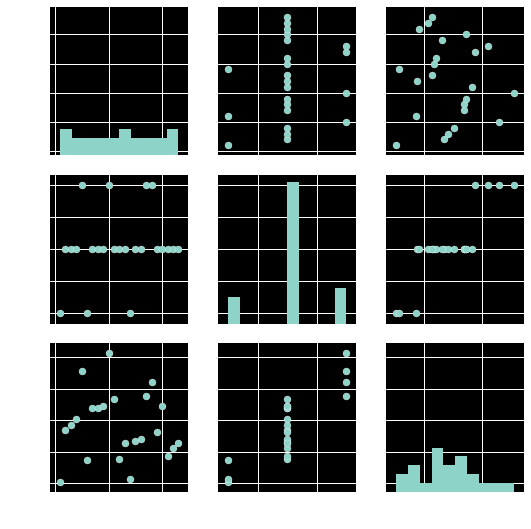

In [5]:
sns.pairplot(df, palette='pastel')

In [6]:
stan_model = """
    data{
        int N;
        real X[N];
        real Y[N];
    }
    
    parameters {
        real a;
        real b;
        real<lower=0> sigma;
    }
    
    model{
        for(n in 1:N){
            Y[n] ~ normal(a *X[n] + b, sigma);
        }
    }
"""

In [7]:
sm = pystan.StanModel(model_code = stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6222a43b6363c1f4b7c99e7b4cd434c1 NOW.


In [8]:
stan_data = {"N": df.shape[0], "X":df["space"], "Y": df["value"]}

In [9]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=1, seed=123)

In [10]:
fit

Inference for Stan model: anon_model_6222a43b6363c1f4b7c99e7b4cd434c1.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      79.03    0.34  11.64  55.52  71.61  78.88  86.74  102.2   1175    1.0
b     -764.1   24.21 834.46  -2433  -1315 -764.7 -230.8 907.49   1188    1.0
sigma 614.85    2.95 106.34  447.4 540.73 601.81 673.65 855.25   1301    1.0
lp__  -152.0    0.04   1.35 -155.3 -152.6 -151.6 -151.0 -150.5   1095    1.0

Samples were drawn using NUTS at Wed Aug  8 22:47:09 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

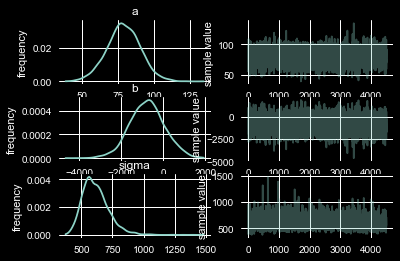

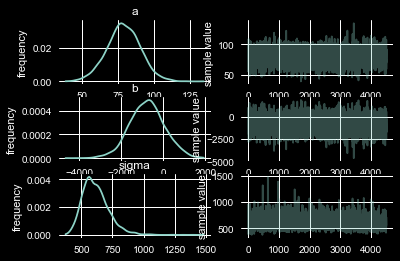

In [18]:
fit.plot()

In [20]:
arr = fit.get_posterior_mean()
a = arr[0][0]
b = arr[1][0]

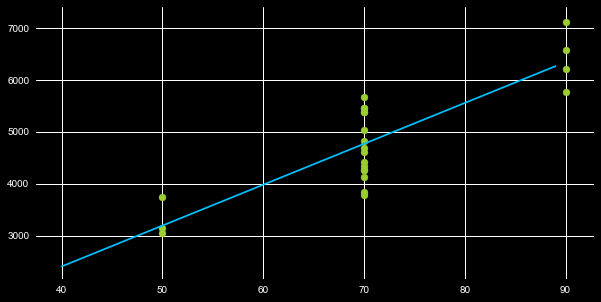

In [31]:
x = np.arange(40, 90, 1)
y = a * x + b
plt.figure(figsize=[10,5])
plt.plot(x,y, color='deepskyblue')
plt.scatter(df['space'], df['value'], color="yellowgreen")